In [494]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [495]:
import xgboost as xgb
import random
from sklearn.metrics import average_precision_score

In [496]:
train = pd.read_csv("train.csv")
test  = pd.read_csv("test.csv")
train = train.fillna(0)
test = test.fillna(0)

In [497]:
T = test.iloc[:,1:].values

In [418]:
X = train.iloc[:,1:-1].values
y = train['label'].values

In [498]:
import numpy as np
from sklearn.model_selection import train_test_split
#Spliteo con shuffle=False es decir ordenado
X_train, X_test, y_train, y_test =\
train_test_split(X,y,test_size = 0.05,shuffle = False,random_state= 500)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
T_std = sc.transform(T)

### Submuestreo

In [499]:
#1.Encuentra el número de muestras que son conversiones
sizeConversiones = len(train[train['label'] == 1])

In [500]:
#2. Obtener índices de muestras de no conversiones.
no_conversiones_indices = train[train.label == 0].index 

In [501]:
#Muestras aleatorias de índices de no conversiones,con una semilla cualquiera
np.random.seed(123)
random_indices_no_conversiones = np.random.choice(no_conversiones_indices,sizeConversiones, replace=False)

In [502]:
#4. Encuentra los índices de muestras de conversiones.
conversiones = train[train.label == 1].index

In [503]:
#5. Índices de conversiones concat con muestras de no conversiones.
under_sample_indices = np.concatenate([conversiones,random_indices_no_conversiones])

In [504]:
#6 Obtener Balance Dataframe
under_sample = train.loc[under_sample_indices]

In [505]:
under_sample = under_sample.sort_values(by="person")

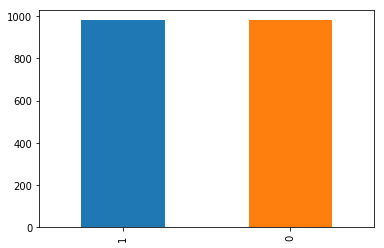

In [506]:
import matplotlib.pyplot as plt
under_sample['label'].value_counts().plot(kind='bar')

In [507]:
X = under_sample.iloc[:,1:-1]
y = under_sample['label']

In [508]:
def xgboost(self, train_X, train_y, test_X, params=None, num_boost_round=32):
    
        dtrain = xgb.DMatrix(train_X, label=train_y)
        dtest = xgb.DMatrix(test_X)
        self.bst = xgb.train(params, dtrain, num_boost_round=32)
        test_y = self.bst.predict(dtest)
        # self.classifier = XGBClassifier(max_depth=6, learning_rate=0.01, n_estimators=550, subsample=0.5, colsample_bytree=0.5, seed=seed)
        # self.classifier.fit(train_X, train_y)
        # test_y = self.classifier.predict_proba(test_X)[:, 1]
        return test_y 

In [509]:
params = {
    'n_estimators':50,
    'objective': 'binary:logistic',
    'learning_rate': 0.6,
    'gamma':0.05,
    'subsample':0.6,
    'colsample_bytree':0.3,
    'min_child_weight':3,
    'max_depth':10,
    'seed':5000,
    }

In [510]:
learning_rate = 0.6
min_child_weight = 3
max_depth = 10
seed = 5000

ValueError: DataFrame.dtypes for data must be int, float or bool.
                Did not expect the data types in fields google_mayo, 1366x768_mayo, 1920x1080_mayo, criteo_mayo, google_abril, 360x640_mayo, Brazil, 1600x900_mayo, 1366x768_abril, 1024x768_mayo, 360x640_abril, rtbhouse_mayo, 1366x768_marzo, 1440x900_mayo, google_marzo, 360x640_marzo, 1360x768_mayo, 320x534_abril, google_enero, criteo_abril, 320x570_mayo, 320x570_abril, google_febrero, 1920x1080_abril, 320x534_mayo, 1024x768_abril, 320x568_mayo, 1920x1080_febrero, 1600x900_abril, rtbhouse_abril, criteo_marzo, 1360x768_marzo, 360x640_febrero, 1600x900_marzo, 1366x768_febrero, 360x640_enero, 1440x900_abril, 1600x900_enero, 1360x768_abril, 320x568_enero, 320x568_abril, 1366x768_enero, 1024x768_enero, 320x570_marzo, United States, 1440x900_febrero, 1920x1080_enero, criteo_enero, 1024x768_marzo, 1440x900_marzo, 1360x768_enero, 320x570_febrero, 1440x900_enero, 1024x768_febrero, 320x568_marzo, 320x534_marzo, rtbhouse_febrero, 1600x900_febrero, 1360x768_febrero, 320x570_enero, 320x534_enero, 1920x1080_marzo, criteo_febrero, rtbhouse_marzo, 320x568_febrero, Argentina, 320x534_febrero, Canada, rtbhouse_enero

In [512]:
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
print(recall_score(y_test, predict.round()))
print(accuracy_score(y_test, predict.round()))

ValueError: Found input variables with inconsistent numbers of samples: [98, 971]

In [493]:
predict_final = xgboost(xgb,X_train,y_train, T,params,32)

[14:35:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=10
[14:35:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 94 extra nodes, 0 pruned nodes, max_depth=10
[14:35:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 94 extra nodes, 4 pruned nodes, max_depth=10
[14:35:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 2 pruned nodes, max_depth=10
[14:35:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=10
[14:35:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 2 pruned nodes, max_depth=10
[14:35:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 96 extra nodes, 0 pruned nodes, max_depth=10
[14:35:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 2 pruned nodes, max_depth=10
[14:35

ValueError: feature_names mismatch: ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60', 'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70', 'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77', 'f78', 'f79', 'f80', 'f81', 'f82', 'f83', 'f84', 'f85', 'f86', 'f87', 'f88', 'f89', 'f90', 'f91', 'f92', 'f93', 'f94', 'f95', 'f96', 'f97', 'f98', 'f99', 'f100', 'f101', 'f102', 'f103', 'f104', 'f105', 'f106', 'f107', 'f108', 'f109', 'f110', 'f111', 'f112', 'f113'] ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60', 'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70', 'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77', 'f78', 'f79', 'f80', 'f81', 'f82', 'f83', 'f84', 'f85', 'f86', 'f87', 'f88', 'f89', 'f90', 'f91', 'f92', 'f93', 'f94', 'f95', 'f96', 'f97', 'f98', 'f99', 'f100', 'f101', 'f102', 'f103', 'f104', 'f105', 'f106', 'f107', 'f108']
expected f110, f111, f109, f113, f112 in input data

0.049763594

In [275]:
troca = pd.read_csv("trocafone.csv")

In [276]:
troca["label"] = predict_final

In [278]:
troca.to_csv("submit_Xgboost_nuevosFeatures.csv",index = False)